-1.0714285714285714
-0.14285714285714285
-1.0714285714285718
-0.1428571428571435


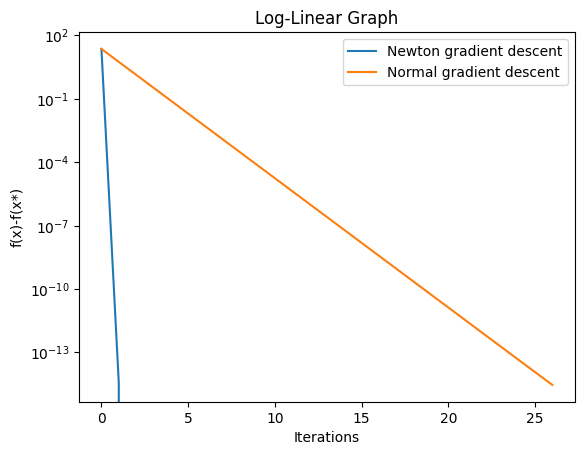

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

#We use symbolic variables x and y for our function
x= sp.symbols('x')
y=sp.symbols('y')

#Here we setup the function we are trying to minimize
f=((10*x**2)+(22*x)+(13*y**2)+(8*y)+(4*x*y)+(13))/9

#Creating the gradient
dfx=sp.diff(f,x)
dfy=sp.diff(f,y)

# Creating the Hessian in this case the hessian is constant
dfxx=sp.diff(dfx,x)
dfxy=sp.diff(dfx,y)
dfyy=sp.diff(dfy,y)
dfyx=sp.diff(dfy,x)
hessian_f=np.array([[dfxx, dfxy],[dfyx,dfyy]])

#Random starting point with

func_truth=np.array([[-15/14],[-1/7]])

point_main=np.array([[10],[20]])
x0=point_main[0,0]
y0=point_main[1,0]

# I am running through 27 iterations to reduce the step size using newtons method. In this method we use the formula
# xk+1=xk- inv(Hessian)*gradient.
# Since the function is a second order function we can estimate it correctly in one step!

newton_norm_list=[]
for i in range(27):
    z=np.linalg.inv(np.float64(hessian_f))
    j=np.array([[dfx.subs([(x,x0),(y,y0)])],[dfy.subs([(x,x0),(y,y0)])]])
    j=j.astype(float)
    diff_j=point_main-func_truth
    newton_norm_list.append(np.linalg.norm(diff_j))
    k=np.matmul(z,j)
    point_main=point_main-k
    x0=point_main[0,0]
    y0=point_main[1,0]

for i in range(len(newton_norm_list)):
    if newton_norm_list[i]< 10e-17:
        newton_norm_list[i]=0
    else:
        continue

print(x0)
print(y0)
x_list=[i for i in range(0,27)]



#Lets use regular gradient descent algorith
#xk+1 = xk - a*gradient where a is a very small step size



point_main_1=np.array([[10],[20]])
x1=point_main_1[0,0]
y1=point_main_1[1,0]
k=0
stp_size=0.4
reg_gd=[]

for i in range(27):
    j1=np.array([[dfx.subs([(x,x1),(y,y1)])],[dfy.subs([(x,x1),(y,y1)])]])
    j1=j1.astype(float)
    diff_j1=point_main_1-func_truth
    reg_gd.append(np.linalg.norm(diff_j1))
    point_main_1=point_main_1-(stp_size*j1)
    x1=point_main_1[0,0]
    y1=point_main_1[1,0]


plt.yscale('log')
plt.plot(x_list,newton_norm_list,label="Newton gradient descent")
plt.xlabel('Iterations')
plt.ylabel('f(x)-f(x*)')
plt.title('Log-Linear Graph')
plt.plot(x_list,reg_gd,label="Normal gradient descent")
plt.legend()
print (x1)
print(y1)
plt.show()


